## Here, we will try adding regularisation technique to the previous model
### referring from `notebook_03.ipynb`

In [1]:
# import required libraries
import numpy as np
import os, sys
import torch
# for plots
import matplotlib.pyplot as plt
# neural network modules
import torch.nn as nn
# PyTorch utilities
from torch.utils.data import DataLoader
# optimizers
import torch.optim as optim

# using functions written in 1st notebook instead of rewriting them again and again
# the functions are made into a module named `utilities` in the `src` directory 
import importlib
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)
from src import utilities
from src.utilities import train_model, evaluate, plot_metrics, prediction_and_image, load_mnist_data, print_conclusion
importlib.reload(utilities)

<module 'src.utilities' from '/home/ravi/Desktop/deep-learning-projects/mnist-cnn/src/utilities.py'>

In [2]:
# set device to cuda(gpu)
if torch.cuda.is_available:
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

device

device(type='cuda')

In [3]:
# load dataset
train_dataset, test_dataset = load_mnist_data()

#### Adding a dropout layer

In [11]:
class CNN3(nn.Module):
    def __init__(self):
        super(CNN3, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1,out_channels=24,kernel_size=3)
        self.pool1 = nn.MaxPool2d(kernel_size=2)

        self.conv2 = nn.Conv2d(in_channels=24,out_channels=48,kernel_size=3)
        self.pool2 = nn.MaxPool2d(kernel_size=2)
        
        self.flatten = nn.Flatten()

        self.fc_linear_1 = nn.Linear(in_features=48*5*5, out_features=256)
        self.relu = nn.ReLU()

        self.fc_linear_2 = nn.Linear(in_features=256, out_features=10)
        self.dropout = nn.Dropout(p=0.7)
    
    def forward(self,X):
        X = self.conv1(X)
        X = self.relu(X)
        X = self.pool1(X)

        X = self.conv2(X)
        X = self.relu(X)
        X = self.pool2(X)

        X = self.flatten(X)
        X = self.dropout(X)
        X = self.fc_linear_1(X)
        X = self.relu(X)
        X = self.fc_linear_2(X)
        return X

In [20]:
# instantiate the model and move to device
deeper_cnn_model_1 = CNN3().to(device)

# define batch size, dataloader, optimizer, and loss functions

# batch size
BATCHSIZE = 128
# dataloader
trainset_loader = DataLoader(train_dataset, BATCHSIZE, shuffle=True)
testset_loader = DataLoader(test_dataset, BATCHSIZE, shuffle=False)

# loss function (Cost Function)
loss_function = torch.nn.CrossEntropyLoss()
optimizer1 = optim.Adam(deeper_cnn_model_1.parameters(), lr=0.004)

EPOCHS = 40

# train the model
losses, accuracies = train_model(deeper_cnn_model_1, trainset_loader, loss_function, optimizer1, EPOCHS)

EPOCH: 1...
EPOCH: 2...
EPOCH: 3...
EPOCH: 4...
EPOCH: 5...
EPOCH: 6...
EPOCH: 7...
EPOCH: 8...
EPOCH: 9...
EPOCH: 10...
EPOCH: 11...
EPOCH: 12...
EPOCH: 13...
EPOCH: 14...
EPOCH: 15...
EPOCH: 16...
EPOCH: 17...
EPOCH: 18...
EPOCH: 19...
EPOCH: 20...
EPOCH: 21...
EPOCH: 22...
EPOCH: 23...
EPOCH: 24...
EPOCH: 25...
EPOCH: 26...
EPOCH: 27...
EPOCH: 28...
EPOCH: 29...
EPOCH: 30...
EPOCH: 31...
EPOCH: 32...
EPOCH: 33...
EPOCH: 34...
EPOCH: 35...
EPOCH: 36...
EPOCH: 37...
EPOCH: 38...
EPOCH: 39...
EPOCH: 40...


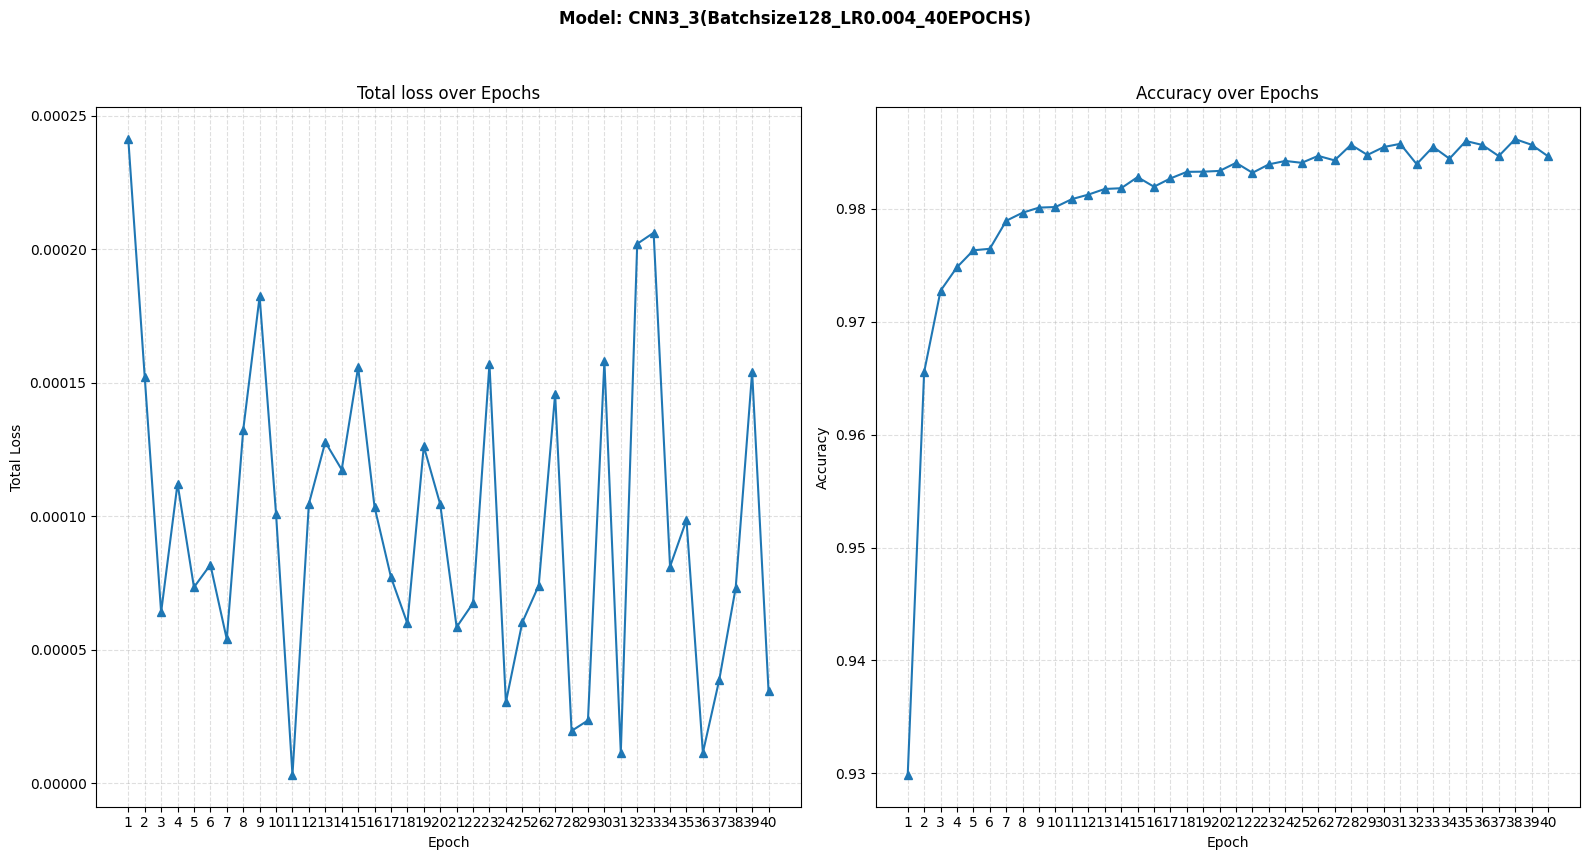

In [21]:
plot_metrics(losses, accuracies, "CNN3_3(Batchsize128_LR0.004_40EPOCHS)")

In [22]:
test_loss, test_accuracy = evaluate(deeper_cnn_model_1, testset_loader, loss_function)
print_conclusion("CNN3(Batchsize128_LR0.004_40EPOCHS)", losses, accuracies, test_loss, test_accuracy)

Model: CNN3(Batchsize128_LR0.004_40EPOCHS)
Loss(Training): 0.000034
Accuracy(Training): 0.984667
Loss(Testing): 0.000003
Accuracy(Testing): 0.991600


The accuracy graph, and train and test accuracies reveal that this might be the best model trained till now.

99.34% is the highest accurcay for test dataset till now.

Let's play with hyperparameters to experiment.

In [23]:
# saving the model
from pathlib import Path

CHECKPOINT = Path("../checkpoints")
CHECKPOINT.mkdir(parents=True, exist_ok=True)

CHECKPOINT_NAME = "CNN3_(Batchsize128_LR0.004_40EPOCHS).pt"
CHECKPOINT_PATH = CHECKPOINT/CHECKPOINT_NAME

state = {
        'epochs' : EPOCHS,
        'model_state_dict': deeper_cnn_model_1.state_dict(),
        'optimizer_state_dict': deeper_cnn_model_1.state_dict(),
        'losses': losses,
        'accuracies': accuracies,
        'batch_size': BATCHSIZE,
        'learning_rate': "default"
    }
torch.save(state, CHECKPOINT_PATH)
print(f"Model saved successfully to {CHECKPOINT_PATH}")

Model saved successfully to ../checkpoints/CNN3_(Batchsize128_LR0.004_40EPOCHS).pt


## Experimenting with the hyperparameters

### 1. Dropout probability=0.7
![alt text](../training-plots/CNN3_2_Dropout_0.7.png)

Model: CNN3 (with dropout probability=0.7)

Loss(Training): 0.000005

Accuracy(Training): 0.988967

Loss(Testing): 0.000002

Accuracy(Testing): 0.992800

**Note:**

This model seems interesting, since the model performs fairly well on the test dataset.

Loss is lower on the test set, and Accuracy is higher on the test set !!!
___________________________________________________

### 2. Doubling the batchsize and learning rate
![alt text](../training-plots/CNN3_3_Batchsize64_LR0.002.png)

Model: CNN3(Doubled Batch Size and LR)

Loss(Training): 0.000027

Accuracy(Training): 0.987483

Loss(Testing): 0.000002

Accuracy(Testing): 0.993800

**Note:**

This model seems interesting, since the model performs fairly well on the test dataset.

Loss is lower on the test set, and Accuracy is higher on the test set !!!
___________________________________________________

### 3. Doubling the batchsize and learning rate and training for longer

BATCHSIZE = 64

LR = 0.004

EPOCHS = 40
![alt text](../training-plots/CNN3_3_Batchsize128_LR0.004_40EPOCHS.png)

Model: CNN3(Batchsize128_LR0.004_40EPOCHS)

Loss(Training): 0.000034

Accuracy(Training): 0.984667

Loss(Testing): 0.000003

Accuracy(Testing): 0.991600
___________________________________________________
